# Multiclass Classification Project
Learning Goals

 - How to read different size images from a directory?
 - How to implement One-vs-one scheme for Multiclass classification?
 - How to use SVM for image classifcation?

In [2]:
import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [73]:
p = Path("images/")
dirs = p.glob("*")
label_dict = {"cats":0, "dogs":1, "horses":2, "humans":3}

image_data = []
labels = []

for folder_dir in dirs:
    #print(folder_dir)
    label = str(folder_dir).split("/")[-1]
    
    for img_path in folder_dir.glob("*.jpg"):
        #Using keras to load images 
        img = image.load_img(img_path, target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])

In [74]:
print(labels)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [75]:
#convert thsi data(image_data) into numpy array
image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

## Randomly Shuffle our Data!

In [76]:
import random

In [77]:
combined  = list(zip(image_data, labels))
random.shuffle(combined)

#Unzip
image_data[:], labels[:] = zip(*combined)

## Visualise the data

In [78]:
def draw_img(img):
    plt.style.use('seaborn')
    plt.imshow(img)
    plt.grid(False)
    plt.axis("off")
    plt.show()
    return

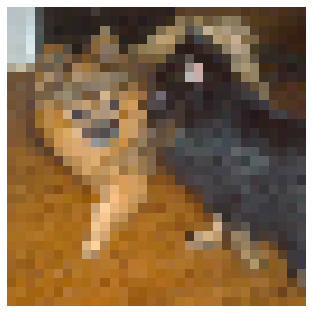

In [79]:
draw_img(image_data[15])

## SVM Classifier

In [80]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

### We need to convert our data for one vs one clssification

In [81]:
M = image_data.shape[0]
image_data = image_data.reshape((M, -1))
print(labels.shape)
print(image_data.shape)

(808,)
(808, 3072)


In [83]:
CLASSES = len(np.unique((labels)))
print(CLASSES)

4


In [87]:
def classWiseData(x, y):
    data = {}
    
    #creating the four labels as keys of the dictionary
    for i in range(CLASSES):
        data[i] = []
    
    #adding the data into it's correponding label 
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    #Converting every value into numpy array
    for k in data.keys():
        data[k] = np.array(data[k])
        
    #returning the dictionary 
    return data

In [88]:
data = classWiseData(image_data, labels)

In [93]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)

(202, 3072)
(202, 3072)
(202, 3072)
(202, 3072)


In [94]:
def getDataPairForSVM(d1, d2):
    """Comnines Data of two classes into a single matrix"""
    
    l1, l2 = d1.shape[0], d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples, features))
    data_labels = np.zeros((samples, ))
    
    data_pair[:l1] = d1
    data_pair[l1:] = d2
    
    data_labels[:l1] = -1#if we do logistic regression then pass  1 & 0    
    data_labels[l1:] = +1
    
    return data_pair, data_labels

## Traning NC2 SVM's part!

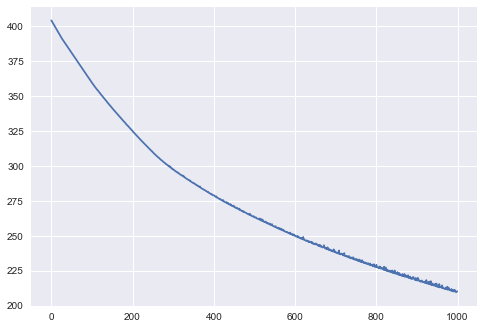

In [104]:
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)

In [115]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss, label='Minimum Loss = %.4f'%loss[-1])
            plt.legend()
            plt.show()
                
    return svm_classifiers

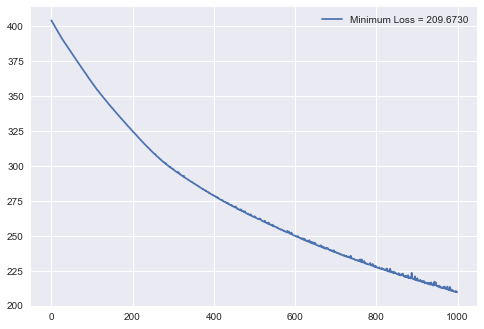

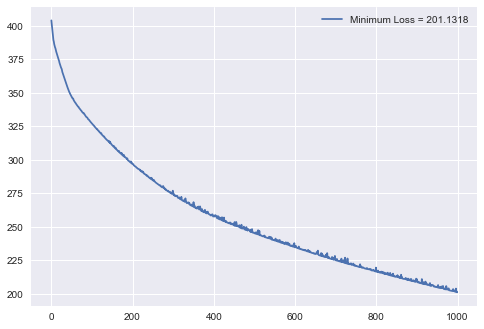

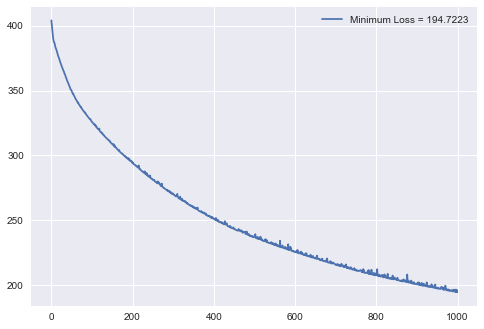

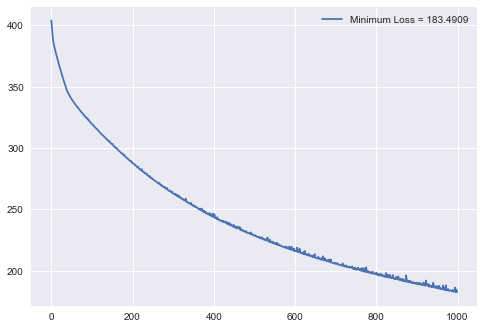

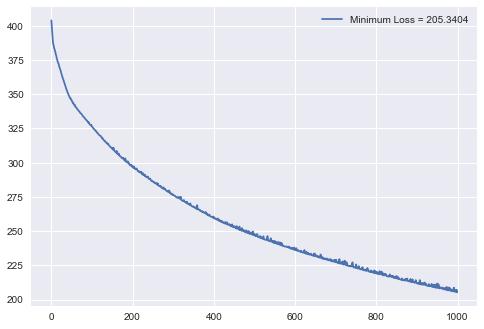

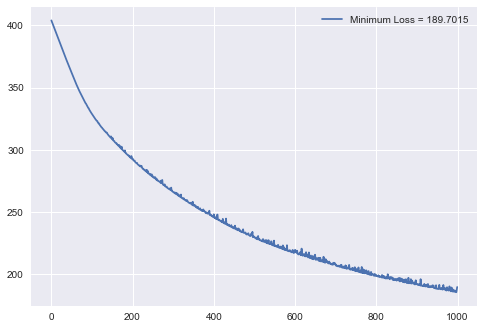

In [116]:
svm_classifiers = trainSVMs(data, labels)   

In [119]:
#parameters for cats and dogs 
cat_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cat_dogs[0].shape)
print(cat_dogs[1])

(1, 3072)
0.0016000000000000042


In [120]:
print(cats_humans[0].shape)
print(cats_humans[1])

(1, 3072)
-0.07413000000000003


## Prediction

In [131]:
def binarypredict(x, w, b):
    z = np.dot(x, w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [132]:
def predict(x):
    count = np.zeros((CLASSES, ))
    
    for i in  range(CLASSES):
        for j in range(i+1, CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction
            z = binarypredict(x,w,b)
            
            #z is calculated for j so if it is 1 then increment j index 
            # and if it is -1 then the binarypredict() preicted i to be more opimum so 
            #incremening the value of i index,  
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
                
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [145]:
print(predict(image_data[69]))
print(labels[69])

3
3


In [146]:
def accuracy(x, y):    
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i]) 
        if(prediction == y[i]):
            count +=1
    return count/x.shape[0]


In [147]:
accuracy(image_data, labels)

0.5853960396039604

# SVM using SK-learn


In [148]:
from sklearn import svm

In [149]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)

In [150]:
svm_classifier.fit(image_data, labels)
svm_classifier.score(image_data, labels)

0.6621287128712872